# Introduction

Data science is a growing field which cuts across many industries. Kaggle has published the 2019 survey results of the Data Scientists who use Kaggle around the world. I am fairly new on Kaggle and would like to use this dataset to answer some questions that are important to me from the Canadian perspective.

# Providing Answers Using the CRISP-DM (Cross Industry Process for Data Mining) Approach
1. Context or Problem or Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling the Data
5. Evaluate the Results
5. Deploy

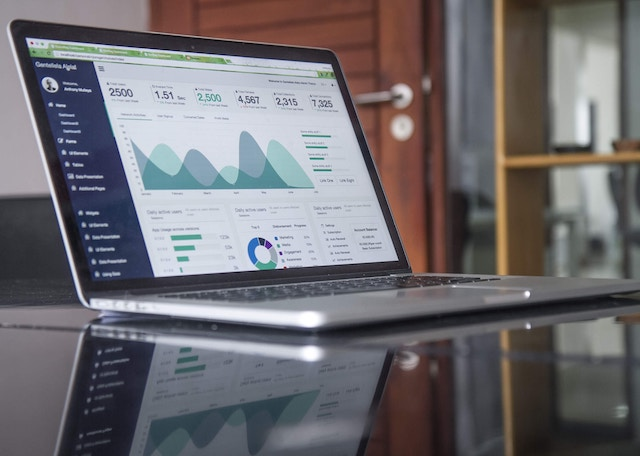

In [1]:
from IPython.display import Image
import os
Image("../input/photos/data_plot.jpg")

Photo by Carlos Muza on Unsplash

# 1. Context Understanding
Below are the questions I want to answer from the dataset.

* What is the demography of the participants
* What is the age, gender and salary distribution of these Data Scientists in the entire dataset and specifically in Canada?
* What percentage of Canadian survey participants are women
* How does Education affect Salary in Canada?
* How does Education affect Job title in Canada?
* Which Job Titles earn the most in Canada?

# 2. Data Understanding
What is the nature of the data used in this analysis? I will be using python and some python libraries to dissect the data in order to gain more insight.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)

from IPython import display
%matplotlib inline

%config IPCompleter.greedy=True

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kaggle-survey-2019/survey_schema.csv
/kaggle/input/kaggle-survey-2019/questions_only.csv
/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv
/kaggle/input/kaggle-survey-2019/other_text_responses.csv
/kaggle/input/photos/canada.jpg
/kaggle/input/photos/data_plot.jpg


## Load and Prepare the Data

In [3]:
dirname = '/kaggle/input/kaggle-survey-2019'
dirname

'/kaggle/input/kaggle-survey-2019'

In [4]:
#Read the csv files with Pandas

questions = pd.read_csv(dirname + '/questions_only.csv')
survey_res = pd.read_csv(dirname + '/multiple_choice_responses.csv')
survey_schema = pd.read_csv(dirname + '/survey_schema.csv')
text_res = pd.read_csv(dirname + '/other_text_responses.csv')
print(f'Reading the shape of the data')
print(f"Questions: {questions.shape}")
print(f"Survey Responses: {survey_res.shape}")
print(f"Survey Schema: {survey_schema.shape}")
print(f"Text responses: {text_res.shape}")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.



Reading the shape of the data
Questions: (1, 35)
Survey Responses: (19718, 246)
Survey Schema: (10, 35)
Text responses: (19718, 28)


There are four csv files available for this analysis. I will be using only the file containing the survey responses from the participants for this analysis since the questions are also form the columns description in multiple-choice responses file.

In [5]:
questions.head(10)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which categories of ML tools do you use on a r...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...


In [6]:
survey_res.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [7]:
survey_res.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
count,19718,19718,19718,19718,19718,19324,19108,19718,14003,13624,...,1853,1193,548,589,416,480,527,1246,288,19718
unique,5305,12,5,49,60,8,13,961,6,8,...,2,2,2,2,2,2,2,2,2,168
top,450,25-29,Male,-1,India,Master’s degree,Data Scientist,-1,0-49 employees,20+,...,Microsoft SQL Server,Oracle Database,Microsoft Access,AWS Relational Database Service,AWS DynamoDB,Azure SQL Database,Google Cloud SQL,None,Other,-1
freq,36,4458,16138,15583,4786,8549,4085,14605,4025,3178,...,1852,1192,547,588,415,479,526,1245,287,15439


From the shape of the questions data file, there are 35 questions asked in the survey.
The multiple choice response table reveals that there were 19,718 responses.
The describe function shows the top numbers from the dataset. There are many more Indian males between the age of 25 and 29, with a masters' degree whose job titles are Data Scientist than any other group in the dataset.

# Canadian Analysis of the Kaggle Data Science/ML Survey 2019

Let's narrow down the analysis to Canada

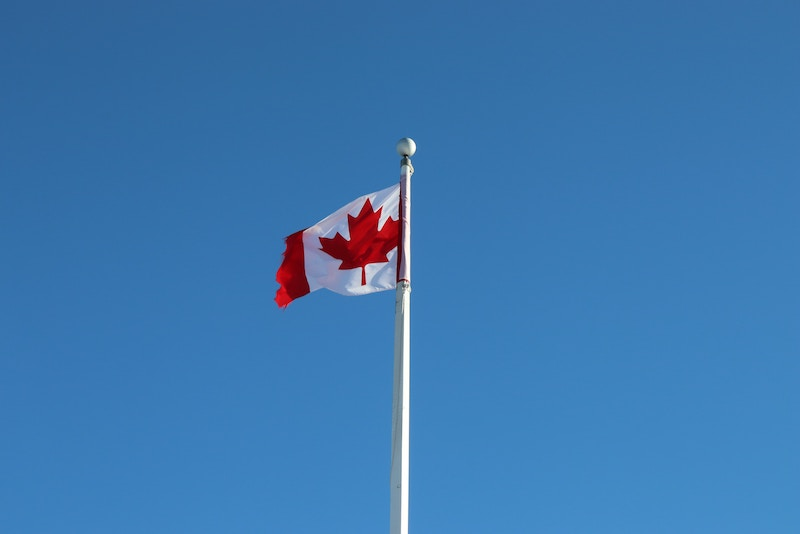

In [8]:
Image("../input/photos/canada.jpg")

[Photo by Maxime Vermeil (@max.vrm) on Unsplash](https://unsplash.com/photos/3fyF1XhZDf4)

# 3. Data Preparation

I am interested in some parts of the dataset, so I will drop the columns that are not important in the process of finding answers to my questions. This will also help reduce the memory size used in my analysis.

## Rename the Columns
First, the columns important for this analysis have to be renamed to have a clearer label. 

In [9]:
survey_res.rename(columns={'Q1' : 'Age',
                           'Q2' : 'Gender',
                           'Q3' : 'Country',
                           'Q4' : 'Education Level',
                           'Q5' : 'Job Title',
                           'Q6' : 'Company Size',
                           'Q10' : 'Salary'},
                  inplace=True)
print(survey_res.columns)

Index(['Time from Start to Finish (seconds)', 'Age', 'Gender', 'Q2_OTHER_TEXT',
       'Country', 'Education Level', 'Job Title', 'Q5_OTHER_TEXT',
       'Company Size', 'Q7',
       ...
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8',
       'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12',
       'Q34_OTHER_TEXT'],
      dtype='object', length=246)


## Drop some columns
Since I will be using only 7 out of the 246 columns in the survey_res data, the irrelevant columns will be dropped.

In [10]:
# Keep relevant columns
col_to_keep = ['Age',
               'Gender',
               'Country',
               'Education Level',
               'Job Title',
               'Company Size',
               'Salary',]
col_to_keep


['Age',
 'Gender',
 'Country',
 'Education Level',
 'Job Title',
 'Company Size',
 'Salary']

In [11]:
#use only the kept columns as the new survey result data
survey_res = survey_res[col_to_keep]
survey_res.head()

,Age,Gender,Country,Education Level,Job Title,Company Size,Salary
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,What is your current yearly compensation (appr...
1,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees","30,000-39,999"
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees","5,000-7,499"
3,55-59,Female,Germany,Professional degree,NaN,NaN,NaN
4,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees","250,000-299,999"


In [12]:
Canada = survey_res[survey_res['Country'].str.contains('Canada')]
print('{} people from Canada participated in the survey'.format(Canada.shape[0]))

450 people from Canada participated in the survey


In [13]:
Canada.describe()

,Age,Gender,Country,Education Level,Job Title,Company Size,Salary
count,450,450,450,445,438,335,301
unique,11,4,1,7,12,5,24
top,25-29,Male,Canada,Master’s degree,Data Scientist,0-49 employees,"60,000-69,999"
freq,87,334,450,172,88,108,50


In [14]:
#Check current data type:
Canada.dtypes

Age                object
Gender             object
Country            object
Education Level    object
Job Title          object
Company Size       object
Salary             object
dtype: object

### Check for missing values and handle them

In [15]:
Canada.isnull().sum()

Age                  0
Gender               0
Country              0
Education Level      5
Job Title           12
Company Size       115
Salary             149
dtype: int64

149 respondents in Canada did not enter salary information. Could it be that they are still students(not working), unemployed or they just decided not to put any value.
12 did not enter a job title while 5 left Education empty. We have to take care of those missing values.

### Manage Missing Values
*** Forward-fill and back-fill up the missing Salary values***


In [16]:
#Comment out the code in order not to refill multiple times

# Canada['Salary'] = Canada['Salary'].fillna(method='ffill', limit=1, inplace=True).fillna(method='bfill', limit=1, inplace=True)
# Canada

In [17]:
Canada.describe()

,Age,Gender,Country,Education Level,Job Title,Company Size,Salary
count,450,450,450,445,438,335,301
unique,11,4,1,7,12,5,24
top,25-29,Male,Canada,Master’s degree,Data Scientist,0-49 employees,"60,000-69,999"
freq,87,334,450,172,88,108,50


**Create a function for plotting the top 10 features in the data for reuse.**

In [18]:
def plotView(feature, title, df, size=1):
    sns.set_style("whitegrid")
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:10], palette='Set3')
    g.set_title("{}".format(title), size=20)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    plt.xlabel(feature,color='#34495E',fontsize=20)
    plt.ylabel('Count',color='#34499E',fontsize=20)
    plt.xticks(size=12,color='#008abc',rotation='vertical')
    plt.yticks(size=12,color='#939497')
    plt.text(0, 3600, feature, fontsize=18,alpha=0.3)
    plt.legend(fontsize=14,loc='topleft',ncol=2)
    
    plt.show() 

### Age Distribution

In [19]:
age = Canada.Age.value_counts()
age

25-29    87
30-34    77
22-24    58
35-39    52
40-44    46
45-49    32
50-54    29
18-21    27
55-59    21
60-69    11
70+      10
Name: Age, dtype: int64

In [20]:
percent_age = (age/(Canada.shape[0]))*100
percent_age

25-29    19.333333
30-34    17.111111
22-24    12.888889
35-39    11.555556
40-44    10.222222
45-49     7.111111
50-54     6.444444
18-21     6.000000
55-59     4.666667
60-69     2.444444
70+       2.222222
Name: Age, dtype: float64

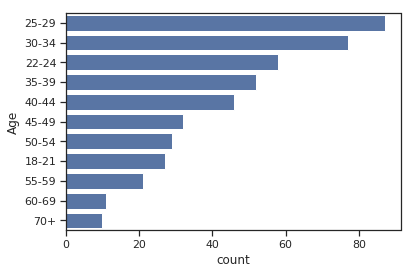

In [21]:
import seaborn as sns


stan_color = sns.color_palette()[0]
sal_order = age.index
sns.countplot(data=Canada, y="Age", color=stan_color, order=sal_order)



* Majority of the respondents in the data science and machine learning field in Canada are aged between 25-29 years old which is 19% of the Canadian survey participants.
* The age of the oldest group is 70+. The youngest age range is 18-21 accounting for 6% of the Canadian respondents (pretty impressive for the youngest age range)

### How about gender distribution in the survey?

In [22]:
gender = Canada.Gender.value_counts()
gender

Male                       334
Female                      99
Prefer not to say           13
Prefer to self-describe      4
Name: Gender, dtype: int64

Taking a deeper insight into the female respondents

In [23]:
Canada_wom = Canada[Canada['Gender']=='Female']
Canada_wom.describe()

,Age,Gender,Country,Education Level,Job Title,Company Size,Salary
count,99,99,99,99,99,77,70
unique,10,1,1,7,12,5,17
top,30-34,Female,Canada,Master’s degree,Data Scientist,0-49 employees,"60,000-69,999"
freq,20,99,99,40,20,29,12


What percentage of the Canadian respondents are women?

In [24]:
percent_women = (Canada_wom.count()/Canada.shape[0])*100
percent_women


Age                22.000000
Gender             22.000000
Country            22.000000
Education Level    22.000000
Job Title          22.000000
Company Size       17.111111
Salary             15.555556
dtype: float64

Approximately, 22% of the respondents identified as Female. Oops! We still have a lot of work to do. We need to increase the volume of the STEM "evangelism loudspeakers". A whopping 74% are Male.

Majority of Canadian women in the survey are aged between 30-34 years, have Master's degree with Job title as Data Scientist. They earn mostly between 60,000 to 69,999 US dollars and work in a company of 0-49 employees. This is typical of the Canadian distribution except for the age range which is older than the top age in the entire dataset across other countries.

#### What about the men?

In [25]:
Canada_men = Canada[Canada['Gender']=='Male']
Canada_men.describe()

,Age,Gender,Country,Education Level,Job Title,Company Size,Salary
count,334,334,334,331,325,248,223
unique,11,1,1,7,12,5,22
top,25-29,Male,Canada,Master’s degree,Data Scientist,0-49 employees,"60,000-69,999"
freq,60,334,334,128,68,76,37


The main difference between the men and the women is in the age range, at least at a peripheral look at the data summary. The top age range for the women (30-34) is older than the top age of the Canadian men which is 25-29.

## What is the Education level of Canadian Data Scientists

In [26]:
Canada_Ed = Canada['Education Level'].value_counts(sort=True)
Canada_Ed

Master’s degree                                                      172
Bachelor’s degree                                                    136
Doctoral degree                                                       87
Some college/university study without earning a bachelor’s degree     26
Professional degree                                                   11
I prefer not to answer                                                 8
No formal education past high school                                   5
Name: Education Level, dtype: int64

In Canada, similar to the entire dataset, majority of respondents have Master's degree.

In [27]:
labels_edu = Canada_Ed.index
values_edu = Canada_Ed.values

edu_colors= ['#A7FFEB','#43A047', '#1B5E20', '#76FF03', '#C6FF00', '#DCEDC8', '#E8F5E9'] 

pie = go.Pie(labels=labels_edu, values=values_edu, marker=dict(colors=edu_colors,line=dict(color='#000000', width=1)))
layout = go.Layout(title='Education Level')

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

## Money Matters (Salary)

In [28]:
Canada_Salary = Canada.Salary.value_counts()
Canada_Salary

60,000-69,999      50
50,000-59,999      34
70,000-79,999      32
100,000-124,999    29
80,000-89,999      29
90,000-99,999      25
40,000-49,999      22
$0-999             17
125,000-149,999    14
30,000-39,999      10
20,000-24,999      10
150,000-199,999     8
25,000-29,999       3
10,000-14,999       3
7,500-9,999         2
4,000-4,999         2
250,000-299,999     2
15,000-19,999       2
1,000-1,999         2
5,000-7,499         1
> $500,000          1
3,000-3,999         1
200,000-249,999     1
300,000-500,000     1
Name: Salary, dtype: int64

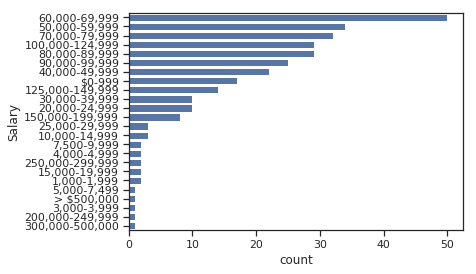

In [29]:
import seaborn as sns

stan_color = sns.color_palette()[0]
#Order the plot by count values
sal_order = Canada_Salary.index
sns.countplot(data=Canada, y='Salary', color=stan_color, order=sal_order)

30 respondents entered their salary values as 0-999. This is below Canadian average salary. These people may be unemployed. Let's look at the Job title to see if the number of unemployed people will match or be close to the number that declared such a low amount in salary.

## What are job titles of the Canadian survey participants

In [30]:
Canada_Job = Canada['Job Title'].value_counts()
Canada_Job

Data Scientist             88
Student                    65
Other                      52
Software Engineer          47
Data Analyst               46
Research Scientist         35
Not employed               30
Business Analyst           27
Product/Project Manager    21
Data Engineer              14
Statistician                7
DBA/Database Engineer       6
Name: Job Title, dtype: int64

As assumed in the salary details, the number of respondents (31) with the **lowest salary** value is close to the number of respondents (30) that declared **unemployed**.

Data Scientist appears top on the job titles.

# 4. Comparing the Features in the Data

Using [ranjeetjain3](https://www.kaggle.com/ranjeetjain3/aws-vs-gcp-vs-azure) for bivariate plot code:

In [31]:
def compute_percentage(df,col):
    return df[col].value_counts(normalize=True) * 100
def bi_variant_chart(col1,col2,x_title,y_title):
    index = Canada[col1].dropna().unique()
    vals = Canada[col2].unique()
    layout = go.Layout()
    trace = []
    for j,y_axis in enumerate(vals):
        trace.append(go.Bar(x = Canada[Canada[col2] == y_axis][col1].value_counts().index,
                            y = Canada[Canada[col2] == y_axis][col1].sort_values().value_counts().values,
                opacity = 0.6, name = vals[j]))
    fig = go.Figure(data = trace, layout = layout)
    fig.update_layout(
        title = x_title,
        yaxis = dict(title = y_title),
        legend = dict( bgcolor = 'rgba(255, 255, 255, 0)', bordercolor = 'rgba(255, 255, 255, 0)'),
        bargap = 0.15, bargroupgap = 0.1,legend_orientation="h")
    fig.show()

## How Does Education Level Affect Salary?

In [32]:
bi_variant_chart("Salary","Education Level","Salary VS Education Level","Count")

### Interpretation

Some of the participants with Doctoral degree earned within $0-999$ while some earned as high as $299,999$. 

The low value is probably those who are unemployed because this Salary does not correlate with the Canada average wage.
The participants who earned over "$100k"$ had at least some college degree and mostly Master's or Doctoral degree.
The outlier salary within range of 300,000-500,000 is a fellow with Bachelor's degree. What kind of job do they do? I'm curious to find out.

## Salary Vs Job Title

In [33]:
bi_variant_chart("Salary","Job Title","Salary VS Job Title","Count")

To get a closer look at each of the Job Titles vs Salary, double click on the Job Title legend below the bar chart plot. 
See the maximum salary for each job title below:

* Research Scientist: 125,000 to 149,999
* Data Engineer: 250,000 to 299,999
* Business Analyst: 125,00-149,999
* Not Employed: 250,000 to 299,999. Wait! How can someone who claimed to be unemployed still declare a salary value up to 250,000? What is going on here? Does that mean Salary is not a piece of reliable information at all
* Data Scientist: 200,000-249,999
* Other: 0-999 to >500,000. Why did they choose other? It could be that their job title is not in the options listed in the survey questions. 
* Software Engineer: 150,000-199,999
* Statisticians: 300,000-500,000. Very few people have this job title and earn quite high.
* Data Analyst: 90,000-99,999
* DBA/Database Engineer: 100,000-124,999
* Student: 150,000-199,000. Do these students really earn this much or they entered their "Wish List Salary" in the survey?
* Product/Project Manager: 100,000-124,999

The salary values for the different job title raise some questions and seems unreliable especially from those who said they are Students, Unemployed and Other.
The Statistician is the one I was curious to know what his/her job title is. We'll find out if this person is a man or woman soon.

## Company Size Vs Salary

In [34]:
bi_variant_chart("Company Size","Salary","Company Size VS Salary","Count")

#### Interpretation

* Those earning from 300,000 to 500,000 dollars and above work for companies with 0-49 employee size
* Majority those earning 200,000 to 299,999 work for companies with over 1000 to 10,000 employees (large corporations).
* The 60,000 to 69,999 earners which is the mode salary for this data work every where. They work at companies with employee size 0-49 (Start-Ups) to company size over 10,000 employees.


## Gender VS Salary

In [35]:
bi_variant_chart("Gender","Salary","Gender VS Salary","Count")

**Interpretation**

* The second-highest salaries 300,000 to 500,000...goes to a man who happens to be a Statistician. The other man with the salary over 500,000 did not tell us his job title. We'll leave it at that. At least we have found answer to the curious money question.
* Only one woman declared salary of 250,000-299,999 which is the highest for the Female participants
* 6 women were in the range of 150,000-199,999


This kernel is still work in progress. I will come back from time to time to update it. Thanks for reading.